Click this button to run in Colab.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/deep_learning_from_scratch/blob/master/ch06/overfit_dropout.ipynb)

In [1]:
# %load overfit_dropout.py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# some helper functions for Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !git clone --filter=blob:none --sparse https://github.com/ssuai/deep_learning_from_scratch.git
    %cd deep_learning_from_scratch
    !git sparse-checkout set dataset common ch06
else:            
    import os
    import sys
    sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

In [3]:
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
# use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

# num_epochs = 301
num_epochs = 501
# num_epochs = 1001
# num_epochs = 1501
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=num_epochs, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3004322605815704
=== epoch:1, train acc:0.16, test acc:0.1408 ===
train loss:2.306294272354925
train loss:2.3185687577122733
train loss:2.3050947385943314
=== epoch:2, train acc:0.15666666666666668, test acc:0.1409 ===
train loss:2.302851074697065
train loss:2.3167410784414875
train loss:2.280691760297611
=== epoch:3, train acc:0.15666666666666668, test acc:0.1415 ===
train loss:2.3051096185571747
train loss:2.299769720334355
train loss:2.312480250688507
=== epoch:4, train acc:0.16, test acc:0.1422 ===
train loss:2.286592710620197
train loss:2.3277768347015386
train loss:2.298462956838907
=== epoch:5, train acc:0.16333333333333333, test acc:0.1456 ===
train loss:2.303077775996325
train loss:2.3111394562067478
train loss:2.2993012577090703
=== epoch:6, train acc:0.17333333333333334, test acc:0.1471 ===
train loss:2.290690144799314
train loss:2.314820660890656
train loss:2.3248671599392865
=== epoch:7, train acc:0.17, test acc:0.1481 ===
train loss:2.2991716169426883
train l

train loss:2.1746862545614447
train loss:2.136586076316587
train loss:2.159939629586974
=== epoch:112, train acc:0.22666666666666666, test acc:0.1989 ===
train loss:2.1622848732392086
train loss:2.1511714065552554
train loss:2.211690732786596
=== epoch:113, train acc:0.23, test acc:0.2012 ===
train loss:2.1458988990194188
train loss:2.1251276683415226
train loss:2.1799116439700272
=== epoch:114, train acc:0.22666666666666666, test acc:0.1968 ===
train loss:2.1423206910390893
train loss:2.131840443671775
train loss:2.1620105225788238
=== epoch:115, train acc:0.22333333333333333, test acc:0.1943 ===
train loss:2.1398826827168054
train loss:2.1559771575281004
train loss:2.0927422881290165
=== epoch:116, train acc:0.22666666666666666, test acc:0.1944 ===
train loss:2.159385474358367
train loss:2.169514667102211
train loss:2.1473972387289453
=== epoch:117, train acc:0.22666666666666666, test acc:0.1931 ===
train loss:2.203271331625566
train loss:2.193610326774537
train loss:2.18327886142932

train loss:1.9937108663268237
train loss:1.921259131380019
train loss:2.0104681231380477
=== epoch:167, train acc:0.3566666666666667, test acc:0.2736 ===
train loss:1.9434860143105186
train loss:2.00443109294844
train loss:2.029383336575174
=== epoch:168, train acc:0.36, test acc:0.2779 ===
train loss:2.013337890706357
train loss:1.9655787081043676
train loss:2.0644763180820305
=== epoch:169, train acc:0.36666666666666664, test acc:0.2847 ===
train loss:2.0333110644015338
train loss:1.9779266974277223
train loss:1.9772278176390754
=== epoch:170, train acc:0.38333333333333336, test acc:0.2879 ===
train loss:1.993404098025747
train loss:1.9401895387379775
train loss:1.9948905384392348
=== epoch:171, train acc:0.3933333333333333, test acc:0.2913 ===
train loss:1.9624315097695844
train loss:1.9005818052882018
train loss:1.9004462409423817
=== epoch:172, train acc:0.3933333333333333, test acc:0.2923 ===
train loss:1.9275588679105098
train loss:2.0505998165073014
train loss:1.941811467570555

=== epoch:222, train acc:0.5133333333333333, test acc:0.376 ===
train loss:1.8077473183460164
train loss:1.7126032269194238
train loss:1.8054375302809214
=== epoch:223, train acc:0.51, test acc:0.3809 ===
train loss:1.7755506423388971
train loss:1.627206785769497
train loss:1.738750038499662
=== epoch:224, train acc:0.5166666666666667, test acc:0.3834 ===
train loss:1.785582479218195
train loss:1.7080378382351007
train loss:1.672305766370735
=== epoch:225, train acc:0.51, test acc:0.3811 ===
train loss:1.5767432481383852
train loss:1.7559077975116026
train loss:1.8024388391759854
=== epoch:226, train acc:0.51, test acc:0.377 ===
train loss:1.7899947033066423
train loss:1.7029053647246184
train loss:1.693345721908313
=== epoch:227, train acc:0.5133333333333333, test acc:0.3817 ===
train loss:1.76148622813521
train loss:1.7775201112145096
train loss:1.7345518692982806
=== epoch:228, train acc:0.5133333333333333, test acc:0.3864 ===
train loss:1.767274874207856
train loss:1.63434203332649

=== epoch:279, train acc:0.6333333333333333, test acc:0.5096 ===
train loss:1.4553105622873341
train loss:1.4703993521865493
train loss:1.3020288371242774
=== epoch:280, train acc:0.6266666666666667, test acc:0.5071 ===
train loss:1.4452016116611823
train loss:1.5008828204217528
train loss:1.536011674168106
=== epoch:281, train acc:0.6266666666666667, test acc:0.5063 ===
train loss:1.4774701689295902
train loss:1.5517365376215657
train loss:1.5931491782862768
=== epoch:282, train acc:0.6266666666666667, test acc:0.5129 ===
train loss:1.424044889538591
train loss:1.5577489771101556
train loss:1.4534816654515823
=== epoch:283, train acc:0.6266666666666667, test acc:0.5149 ===
train loss:1.3895973129686618
train loss:1.5438646029334044
train loss:1.4260139922615174
=== epoch:284, train acc:0.6266666666666667, test acc:0.5166 ===
train loss:1.5145380853154555
train loss:1.3327760049570188
train loss:1.3505158370507269
=== epoch:285, train acc:0.6233333333333333, test acc:0.5157 ===
train l

=== epoch:335, train acc:0.7266666666666667, test acc:0.5844 ===
train loss:1.1086115105737449
train loss:1.2061339179495203
train loss:1.0649039249102175
=== epoch:336, train acc:0.73, test acc:0.5857 ===
train loss:1.061871159851841
train loss:1.0633906646288716
train loss:1.014919393506745
=== epoch:337, train acc:0.7266666666666667, test acc:0.5848 ===
train loss:1.1307494382480572
train loss:1.0925488798293346
train loss:1.187800586325223
=== epoch:338, train acc:0.7333333333333333, test acc:0.5891 ===
train loss:1.0894950777992432
train loss:1.087525399401003
train loss:1.1564140391377757
=== epoch:339, train acc:0.7366666666666667, test acc:0.5934 ===
train loss:0.9923674010248227
train loss:1.170829632597962
train loss:1.0435852876975773
=== epoch:340, train acc:0.7333333333333333, test acc:0.5928 ===
train loss:1.112583167037923
train loss:1.18471431339261
train loss:1.1139717777435643
=== epoch:341, train acc:0.7433333333333333, test acc:0.5966 ===
train loss:0.98915236427189

=== epoch:391, train acc:0.7966666666666666, test acc:0.6346 ===
train loss:0.8387246959959167
train loss:0.8600942761972129
train loss:0.806419903046344
=== epoch:392, train acc:0.8033333333333333, test acc:0.6335 ===
train loss:0.7919734646971618
train loss:0.7932213532586122
train loss:0.7028086342497035
=== epoch:393, train acc:0.7933333333333333, test acc:0.6348 ===
train loss:0.7472566888501526
train loss:0.7477722283698338
train loss:0.8033277422630631
=== epoch:394, train acc:0.79, test acc:0.6357 ===
train loss:0.7430699813351339
train loss:0.7098941029299004
train loss:0.6824353645249143
=== epoch:395, train acc:0.79, test acc:0.6366 ===
train loss:0.7481745593223416
train loss:0.6578571584743149
train loss:0.6385118616342254
=== epoch:396, train acc:0.7866666666666666, test acc:0.635 ===
train loss:0.7489731054447694
train loss:0.9066579961582956
train loss:0.6519780113682242
=== epoch:397, train acc:0.7966666666666666, test acc:0.638 ===
train loss:0.782244847230315
train l

=== epoch:446, train acc:0.8533333333333334, test acc:0.6697 ===
train loss:0.6328191598757669
train loss:0.6205318896046795
train loss:0.5255056981953764
=== epoch:447, train acc:0.8533333333333334, test acc:0.6722 ===
train loss:0.6256147251486358
train loss:0.5749479241920499
train loss:0.5683955240214742
=== epoch:448, train acc:0.8533333333333334, test acc:0.6744 ===
train loss:0.5894827136767241
train loss:0.48726576935719373
train loss:0.5359766627368466
=== epoch:449, train acc:0.8566666666666667, test acc:0.6731 ===
train loss:0.5250407798785119
train loss:0.4321894438574627
train loss:0.542166731978522
=== epoch:450, train acc:0.86, test acc:0.6751 ===
train loss:0.4280952105852267
train loss:0.5601847036820028
train loss:0.4529248469311055
=== epoch:451, train acc:0.8566666666666667, test acc:0.6748 ===
train loss:0.5569119369999169
train loss:0.4703057221831612
train loss:0.5115218034477433
=== epoch:452, train acc:0.8533333333333334, test acc:0.6742 ===
train loss:0.502292

=== epoch:500, train acc:0.88, test acc:0.693 ===
train loss:0.4874956883760057
train loss:0.4187831161338169
train loss:0.42088449505943615
=== epoch:501, train acc:0.8833333333333333, test acc:0.694 ===
train loss:0.4510592070462852
train loss:0.3408937702564198
=============== Final Test Accuracy ===============
test acc:0.696


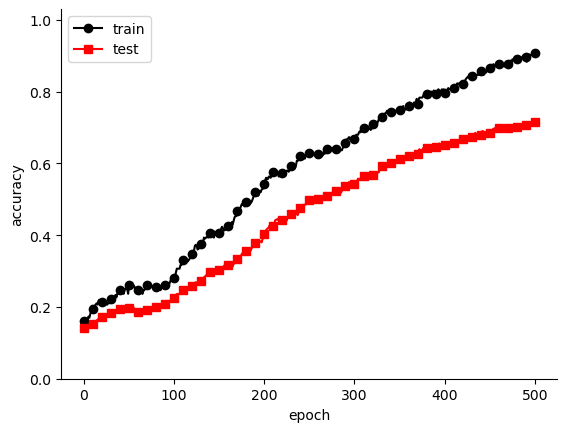

In [5]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, color='k', marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, color='r', marker='s', label='test', markevery=10)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim(0, 1.03)
plt.legend(loc='upper left')
# plt.legend(loc='lower right')
sns.despine()